In [1]:
import numpy as np
import spectral_embedding as se
import matplotlib as mpl
import matplotlib.pyplot as plt

In this example, we show adjacency spectral embedding for weighted stochastic block models. Since we are looking at stochastic block models, we can compute the asymptotic distribution of the embedding as a Gaussian mixture model. Looking at the Gaussian distributions for each community in the stochastic block model, we can compute the Chernoff information showing which data represenation is best for determining community structure in the network.

In [2]:
np.random.seed(42)

We generate a Poisson weighted stochastic block model with $n=1000$ nodes and $K=2$ communities, where nodes are equally likely to be in either community, $\pi = (0.5, 0.5)$. Edge weights are generated within community with rate $\lambda = 0.5$ and between community with rate $\lambda = 0.6$. In this case, the mean block matrix is
$$
    \textbf{B}_\text{Pois} = \left( \begin{array}{cc}
        0.5 & 0.6 \\
        0.6 & 0.5
    \end{array} \right).
$$

In [3]:
K = 2
n = 1000
pi = np.repeat(1/K, K)
B_Pois = np.array([[0.5, 0.6],
                   [0.6, 0.5]])

In [4]:
A_Pois, Z = se.generate_WSBM(n, pi, [B_Pois], 'poisson')

Colour the nodes red or blue depending on their community assignment.

In [5]:
Zcol = [[(1.0,0.0,0.0),(0.0,0.0,1.0)][z] for z in Z]

Embed the nodes into two dimensions, since we know this is the true number of communities in the network.

In [6]:
XA_Pois = se.ASE(A_Pois, K)

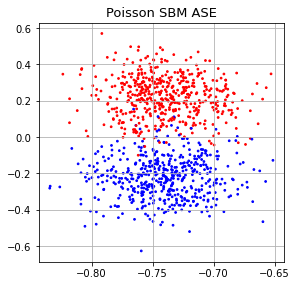

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,4.4))

ax.grid()
ax.scatter(XA_Pois[:,0], XA_Pois[:,1], marker='.', s=12, c=Zcol)
ax.set_title('Poisson SBM ASE', fontsize=13);

We see there is a relatively good distinction between the two communities although there is a small amount of overlap in the two groups. To quantify this, we can compute the asymptotic distribution for the two communities in the Gaussian mixture model. To do this we need the block mean matrix $\textbf{B}_\text{Pois}$, given above, and the block variance matrix $\textbf{C}_\text{Pois} = \textbf{B}_\text{Pois}$ when edge weights have a Poisson distribution.

In [ ]:
X, SigmaX = se.WSBM_distbn(A_Pois, B_Pois, B_Pois, Z, pi, K)

We plot the same diagram adding ellipses showing a 95% confident interval showing the shape of the asymptotic Gaussian distributions in the mixture model. Using these community distributions we get a Chernoff information for the Poisson count adjacency matrix of 0.00227.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,4.4))

ax.grid()
ax.scatter(XA_Pois[:,0], XA_Pois[:,1], marker='.', s=12, c=Zcol)
ax.scatter(X[:,0], X[:,1], marker='o', s=12, c='black')
    
for i in range(K):
    ellipse = se.gaussian_ellipse(X[i], SigmaX[i][0:2,0:2]/n)
    ax.plot(ellipse[0], ellipse[1],'--', color='black')

ax.set_title('Poisson SBM ASE', fontsize=13);

In [ ]:
print('Chernoff information:', np.round(se.chernoff(X, SigmaX), 5))

Rather than using the Poisson counts for the edge weights, we could instead create an unweighted network that measures whether an edge had a count greater than zero, that is, $\mathbf{A}_{ij}' = I(\mathbf{A}_{ij} > 0)$. We can repeat the entire embedding process like we did above for the Poisson counts.

In [ ]:
A_Bern = np.sign(A_Pois)

In [ ]:
XA_Bern = se.ASE(A_Bern, K)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,4.4))

ax.grid()
ax.scatter(XA_Bern[:,0], XA_Bern[:,1], marker='.', s=12, c=Zcol)
ax.set_title('Bernoulli SBM ASE', fontsize=13);

It is hard to immediate tell if this is better or worse than using the Poisson counts. The example was designed for this to be the case by our choice of $\textbf{B}_\text{Pois}$. To test which representation is better, we can again compute the asymptotic distribution for the two communities in the Gaussian mixture model.

If $X \sim \text{Poisson}(\lambda)$, then $I(X > 0) \sim \text{Bernoulli}(1 - e^{-\lambda})$. We use this to compute the matrix $\textbf{B}_\text{Bern}$.

In [ ]:
B_Bern = 1 - np.exp(-B_Pois)

In [ ]:
X, SigmaX = se.SBM_distbn(A_Bern, B_Bern, Z, pi, K)

We plot the same diagram adding ellipses showing a 95% confident interval showing the shape of the asymptotic Gaussian distributions in the mixture model. Using these community distributions we get a Chernoff information for the Bernoulli unweighted adjacency matrix of 0.00171. This is smaller than the Chernoff information in the Poisson count data representation, so the weighted version is preferred for community separation.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,4.4))

ax.grid()
ax.scatter(XA_Bern[:,0], XA_Bern[:,1], marker='.', s=12, c=Zcol)
ax.scatter(X[:,0], X[:,1], marker='o', s=12, c='black')
    
for i in range(K):
    ellipse = se.gaussian_ellipse(X[i], SigmaX[i][0:2,0:2]/n)
    ax.plot(ellipse[0], ellipse[1],'--', color='black')

ax.set_title('Bernoulli SBM ASE', fontsize=13);

In [ ]:
print('Chernoff information:', np.round(se.chernoff(X, SigmaX), 5))